# Proyecto Machine Learning

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import data_describe as dd

In [5]:
## visualización de los datos
data = pd.read_csv("data/in-vehicle-coupon-recommendation.csv")
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
## tipo de columnas
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [7]:
## estructura de la data
data.shape

(12684, 26)

In [8]:
## visualizar si existen valores nulos
print("Datos que tiene NAN por columnas","\n","-"*30)
data.isna().sum().sort_values( ascending = False)

Datos que tiene NAN por columnas 
 ------------------------------


car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
Y                           0
maritalStatus               0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
occupation                  0
has_children                0
education                   0
direction_opp               0
income                      0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
destination                 0
dtype: int64

In [9]:
## porcentaje de nan de cada columna
(data.isna().sum().sort_values( ascending = False) / data.shape[0]) * 100

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
Y                        0.000000
maritalStatus            0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
occupation               0.000000
has_children             0.000000
education                0.000000
direction_opp            0.000000
income                   0.000000
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
destination              0.000000
dtype: float64

la variable car el 99 % de sus valores son nulos

In [10]:
data.car.unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [11]:
## Summary de los datos
dd.data_summary(data,as_percentage=True)


,Info
Rows,12684
Columns,26
Size in Memory,2.5 MB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
destination,object,0.0%,0.0%,,,,,,3,49.5%
passanger,object,0.0%,0.0%,,,,,,4,57.6%
weather,object,0.0%,0.0%,,,,,,3,79.4%
temperature,int64,0.0%,0.0%,30,80,80,63.30,19.15,3,51.5%
time,object,0.0%,0.0%,,,,,,5,25.5%
coupon,object,0.0%,0.0%,,,,,,5,31.5%
expiration,object,0.0%,0.0%,,,,,,2,55.9%
gender,object,0.0%,0.0%,,,,,,2,51.3%
age,object,0.0%,0.0%,,,,,,8,20.9%
maritalStatus,object,0.0%,0.0%,,,,,,5,40.2%


None

data-describe Summary Widget

### Analizando las variables del dataset

Text(0.5, 0.98, 'Boxplot variables numéricas')

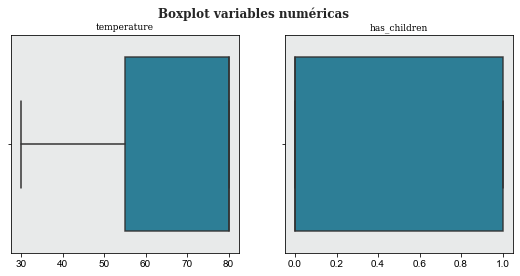

In [12]:
## Variables númericas
fig, axes = plt.subplots(nrows= 1,ncols = 2, figsize = (9,4))
axes = axes.flat

var_numeric = ['temperature','has_children']

for i,variable in enumerate(var_numeric):
    sns.set_style("whitegrid")
    sns.boxplot(data = data,
    x = variable,
    ax = axes[i],
    color =  "#057da0",
    boxprops=dict(alpha=.9)
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e8eaea')
fig.suptitle("Boxplot variables numéricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

la variable has_children es una variable categórica de 0 a 1

Text(0.5, 0.98, 'Plot bar variables categóricas')

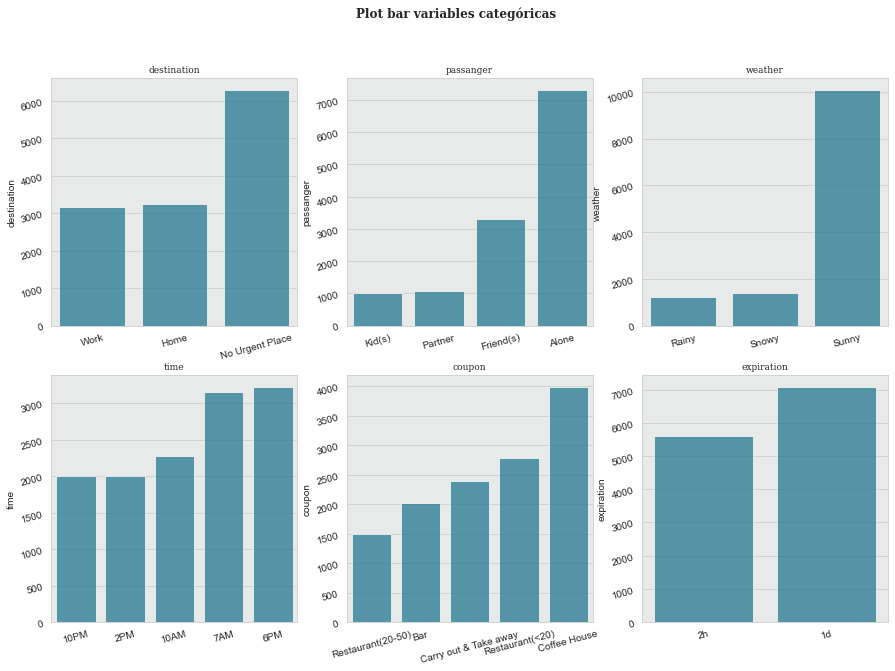

In [13]:
## variables categóricas
fig, axes = plt.subplots(nrows= 2,ncols = 3, figsize = (15,10))
axes = axes.flat

var_string = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration']

for i,variable in enumerate(var_string):
    dt_plot = data[variable].value_counts(dropna=False).sort_values().reset_index()
    sns.set_style("whitegrid")
    sns.barplot(data = dt_plot,
    x = "index",
    y = variable,
    ax = axes[i],
    color =  "#057da0",
    alpha = 0.7,
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].set_facecolor('#e8eaea')
fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Plot bar variables categóricas')

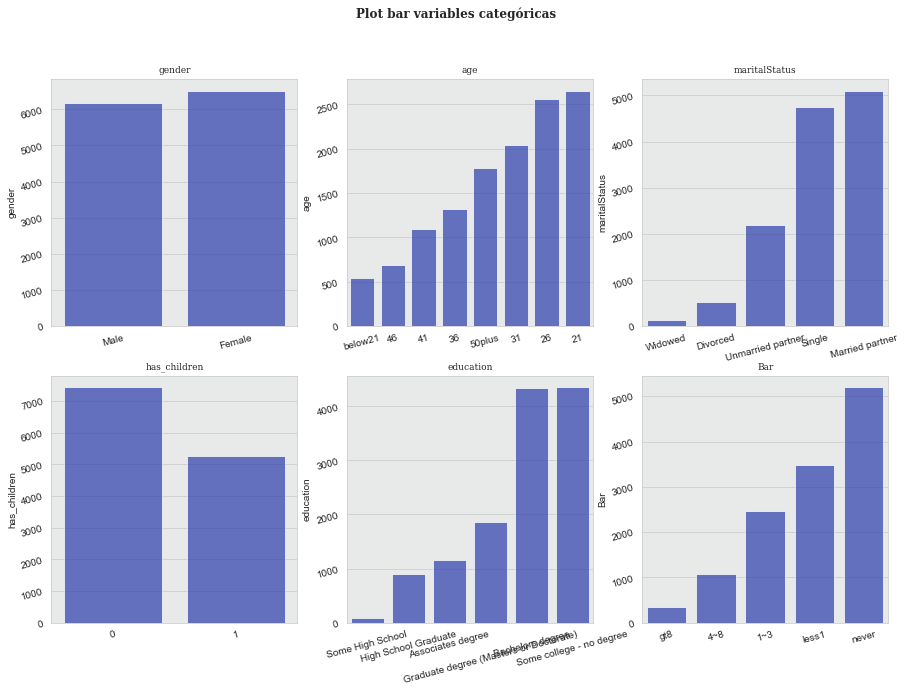

In [14]:
fig, axes = plt.subplots(nrows= 2,ncols = 3, figsize = (15,10))
axes = axes.flat

var_string = ['gender', 'age', 'maritalStatus', 'has_children',
 'education','Bar']

for i,variable in enumerate(var_string):
    dt_plot = data[variable].value_counts(dropna=False).sort_values().reset_index()
    sns.set_style("whitegrid")
    sns.barplot(data = dt_plot,
    x = "index",
    y = variable,
    ax = axes[i],
    color =  "#152ec1",
    alpha = 0.7
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e8eaea')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 1.0, ' Ocupación de la persona\n (Plot bar)')

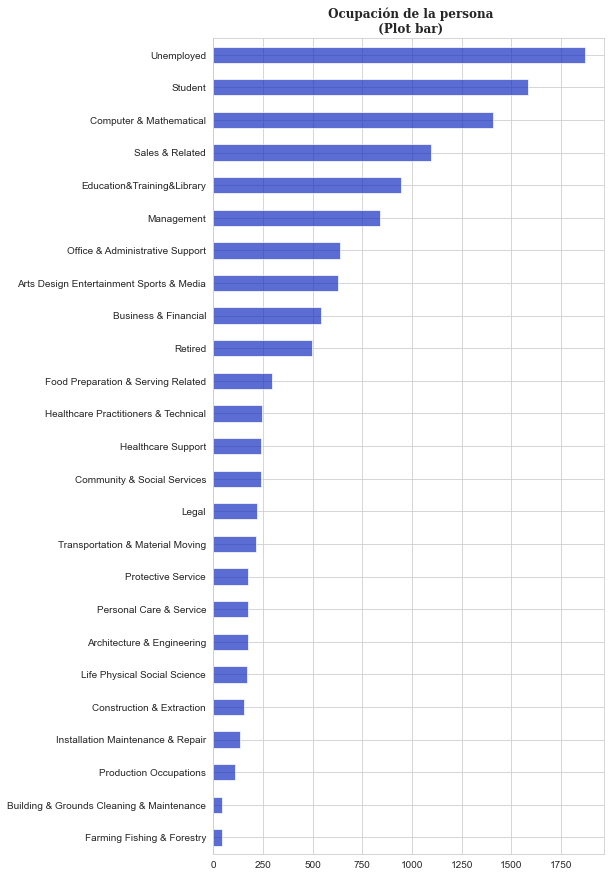

In [15]:
plt.figure(figsize = (7,15))
bars = data["occupation"].value_counts(dropna=False).sort_values().plot(kind = "barh", color = "#152ec1", alpha = 0.7)
plt.title(" Ocupación de la persona\n (Plot bar)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

In [16]:
data["occupation"].value_counts(dropna=False).sort_values(ascending= False)

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Protective Service                            175
Personal Care & Service                       175
Architecture & Engineering                    175
Life Physical Social Science                  170


Text(0.5, 0.98, 'Plot bar variables categóricas')

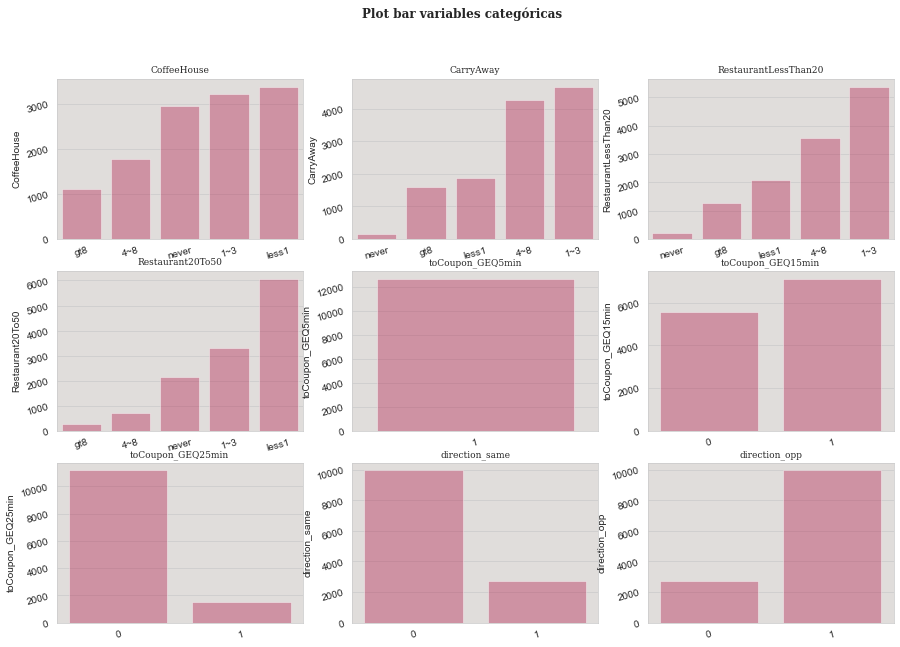

In [17]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (15,10))
axes = axes.flat

var_string =  ['CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp']

for i,variable in enumerate(var_string):
    dt_plot = data[variable].value_counts(dropna=False).sort_values().reset_index()
    sns.set_style("whitegrid")
    sns.barplot(data = dt_plot,
    x = "index",
    y = variable,
    ax = axes[i],
    color =  "#cb0b46",
    alpha = 0.4
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Plot bar variables categóricas')

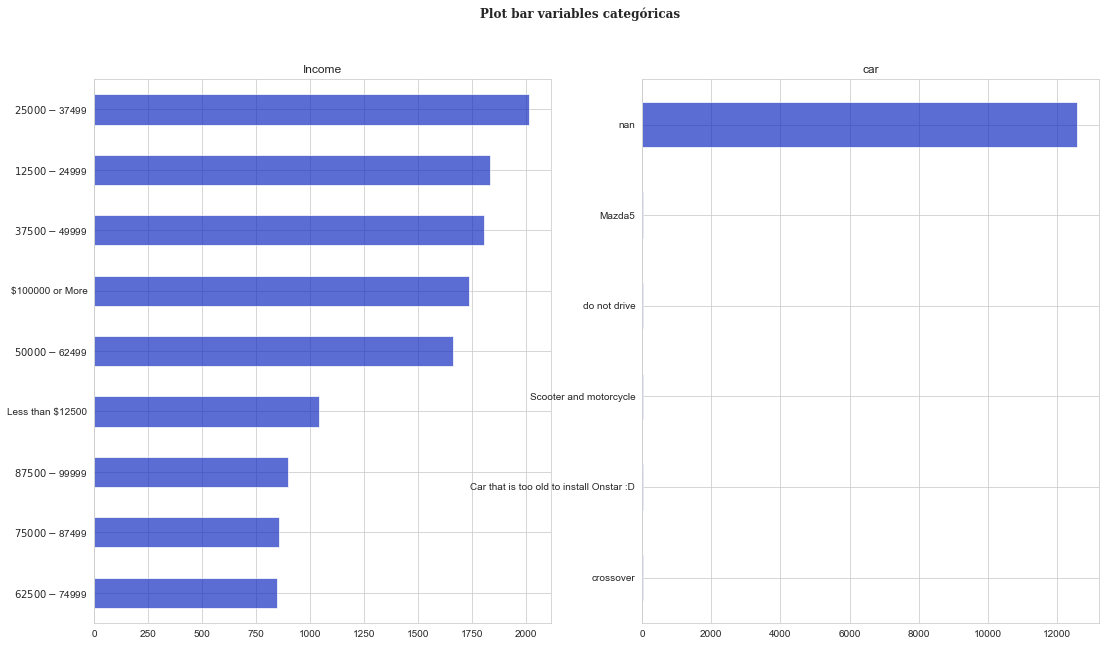

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (18,10))
data["income"].value_counts(dropna=False).sort_values().plot(kind = "barh", color = "#152ec1", alpha = 0.7, ax = axes[0], title = "Income")
data["car"].value_counts(dropna=False).sort_values().plot(kind = "barh", color = "#152ec1", alpha = 0.7, ax = axes[1], title = "car")

fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

<AxesSubplot:>

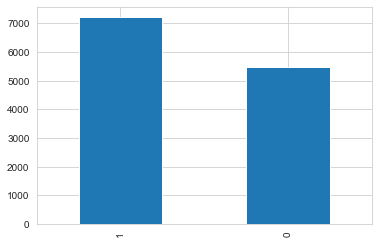

In [27]:
## Analizando la variable respuestas

data.Y.value_counts().plot(kind = "bar")

### Transformar variables categóricas a catégoricas ordenadas


age, marital_status, education, bar, time, expiration, coffehouse, carryaway, restaurantlessthan20, restaurant20to50, income

In [134]:
## Creando una copia de la data y categorizando las variables
data2 = data.copy()
data2.age = pd.Categorical(data.age, categories=['below21','21', '26', '31', '36', '41','46', '50plus'], ordered= True)
data2.Bar = pd.Categorical(data.Bar, categories = ['never', 'less1', '1~3','4~8','gt8'], ordered = True)
data2.time = pd.Categorical(data.time, categories = ['7AM', '10AM', '2PM','6PM', '10PM'], ordered = True)
data2.expiration = pd.Categorical(data.expiration, categories = ['2h','1d'], ordered = True)
data2.CoffeeHouse = pd.Categorical(data.CoffeeHouse, categories = ['never', 'less1','1~3','4~8','gt8'], ordered = True)
data2.CarryAway = pd.Categorical(data.CarryAway, categories = ['never','less1','1~3','4~8','gt8'], ordered = True)
data2.Restaurant20To50 = pd.Categorical(data.Restaurant20To50, categories = ['never','less1','1~3','4~8','gt8'], ordered = True)
data2.RestaurantLessThan20 = pd.Categorical(data.RestaurantLessThan20, categories = ['never','less1','1~3','4~8','gt8'], ordered = True)
data2.income = pd.Categorical(data.income, 
categories = ['Less than $12500','$12500 - $24999','$25000 - $37499', '$37500 - $49999','$50000 - $62499',
'$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
  ordered = True)

### Analizando la variable dependiente con las variables independientes

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

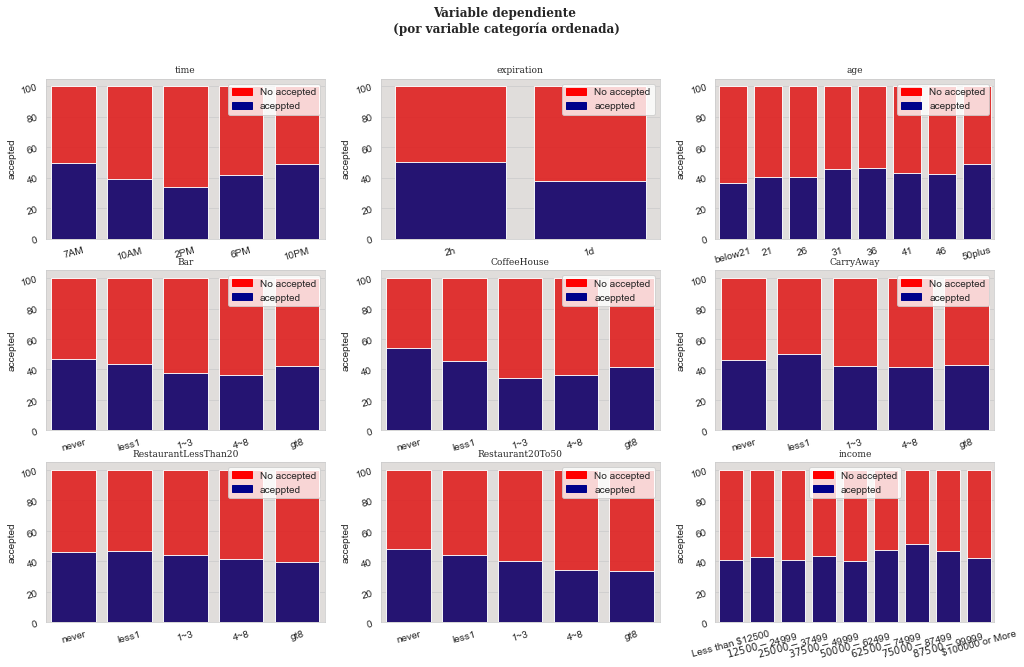

In [209]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    ## creando el grupo de dataset
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={0:"accepted",1 : "No accepted"})
    plot_y3  = plot_y2
    plot_y3["total"]= plot_y2["accepted"]+ plot_y2["No accepted"]

    plot_y3["accepted"] = [i / j * 100 for i,j in zip(plot_y3["accepted"], plot_y3["total"])]
    plot_y3["No accepted"] = [i / j * 100 for i,j in zip(plot_y3["total"], plot_y3["total"])]

    ## plot 1
    bar1 = sns.barplot(data = plot_y3,
    x = variable, y = "No accepted", color= "red", ax = axes[i], alpha = 0.9)

    # plot 2
    bar2 = sns.barplot(data = plot_y3,
    x = variable, y = "accepted", color= "darkblue", estimator=sum, ax = axes[i], alpha = 0.9)

    # combinar

    top_bar = mpatches.Patch(color='red', label='No accepted')
    bottom_bar = mpatches.Patch(color='darkblue', label='aceppted')
    axes[i].legend(handles=[top_bar, bottom_bar])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

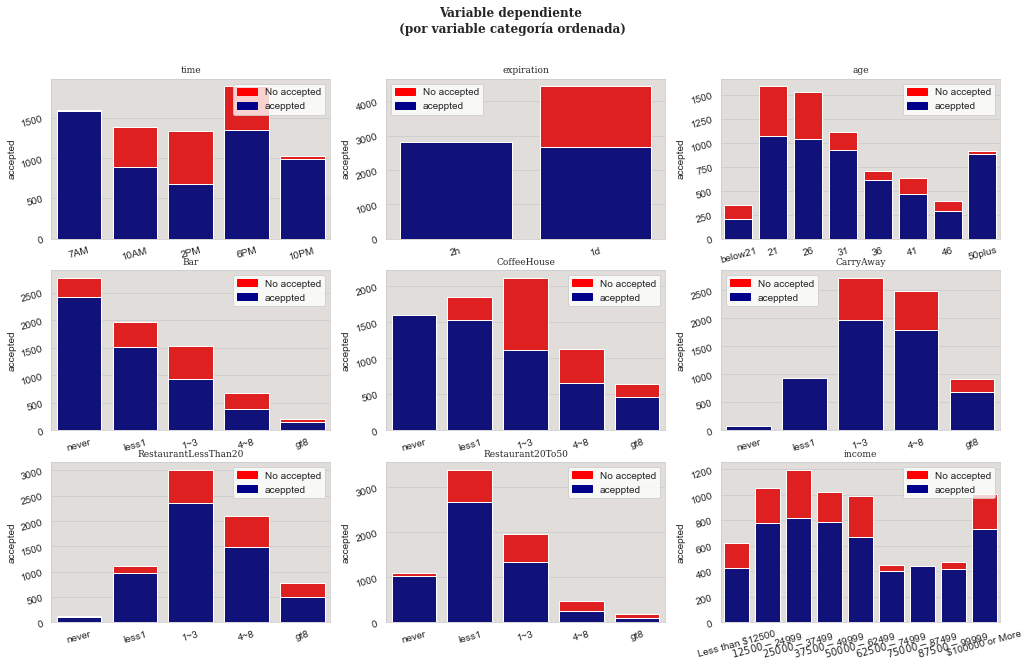

In [210]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    ## creando el grupo de dataset
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={0:"accepted",1 : "No accepted"})

    ## plot 1
    sns.barplot(data = plot_y2,
    x = variable, y = "No accepted", color= "red", ax = axes[i])

    # plot 2
    bottom_plot = sns.barplot(data = plot_y2,
    x = variable, y = "accepted", color= "darkblue", estimator=sum, ax = axes[i])

    # combinar

    top_bar = mpatches.Patch(color='red', label='No accepted')
    bottom_bar = mpatches.Patch(color='darkblue', label='aceppted')
    axes[i].legend(handles=[top_bar, bottom_bar])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Plot bar variables categóricas')

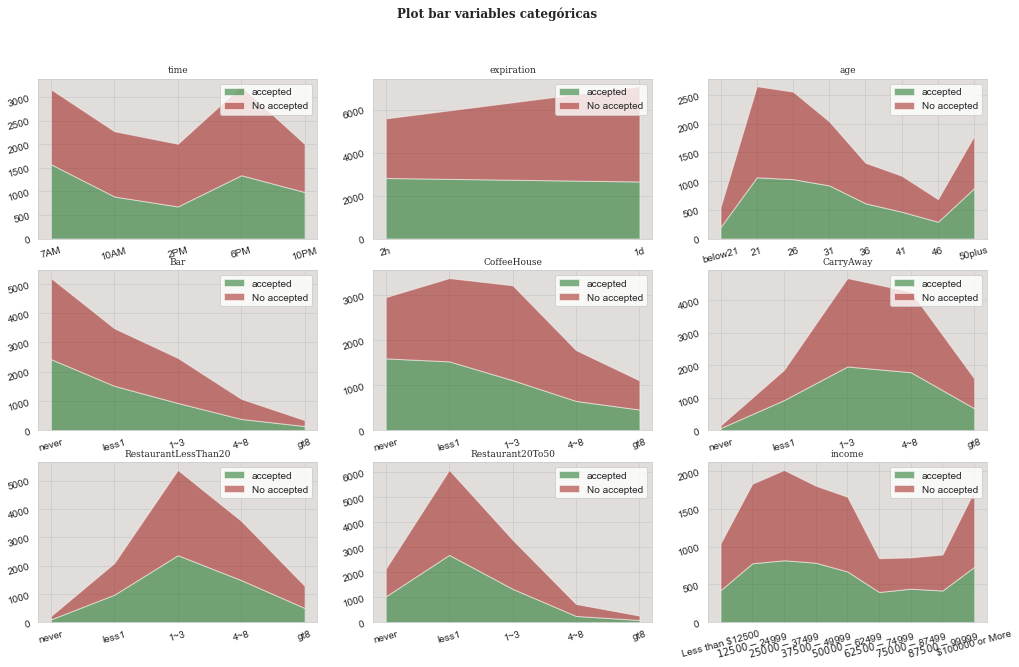

In [137]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={0:"accepted",1 : "No accepted"})

    axes[i].stackplot(plot_y2[variable],plot_y2["accepted"], plot_y2["No accepted"], 
    labels =["accepted","No accepted"],alpha = 0.5, colors = ["#05680e","#9a0b05"])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].legend(loc='upper right')
fig.suptitle("", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

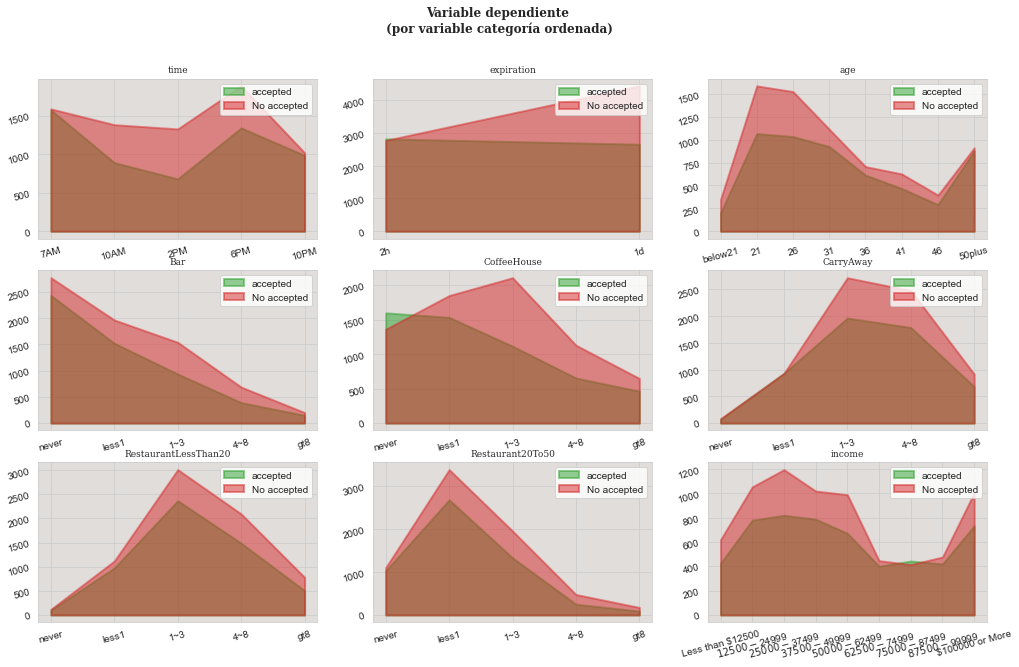

In [166]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={0:"accepted",1 : "No accepted"})

    axes[i].fill_between(plot_y2[variable],plot_y2["accepted"], alpha = 0.5, label ="accepted", color = 'tab:green',linewidth=2)
    axes[i].fill_between(plot_y2[variable],plot_y2["No accepted"], alpha = 0.5, label = "No accepted", color = 'tab:red', linewidth=2)

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

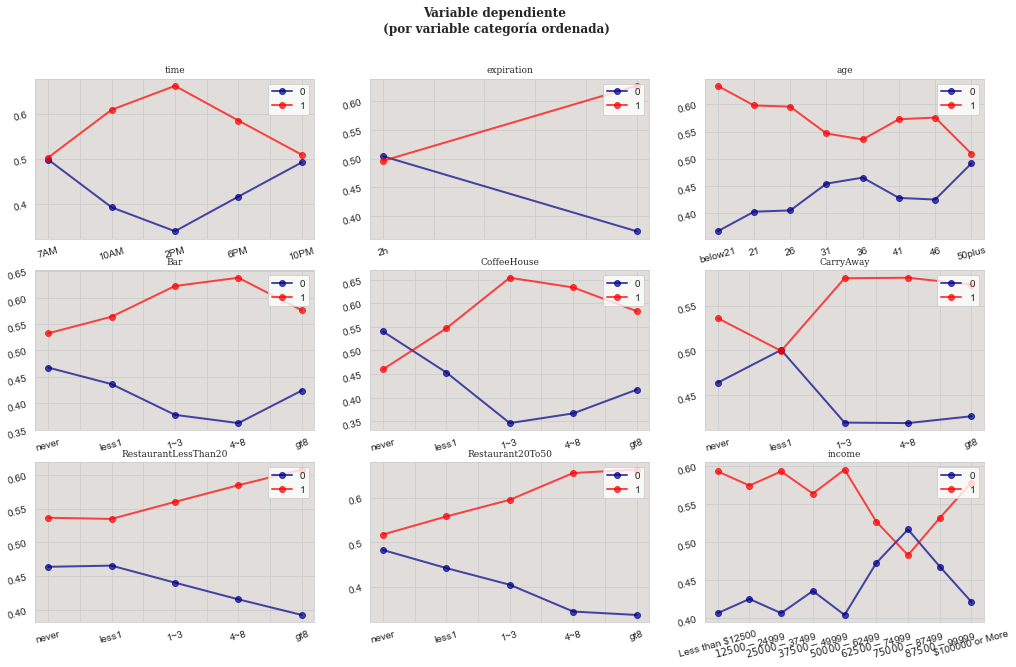

In [222]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    pd.crosstab(data2[variable],data2["Y"], 
    normalize = "index").plot(color = ['darkblue','red'],marker='o', linewidth = 2, alpha = 0.7, ax = axes[i])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

<AxesSubplot:ylabel='gender'>

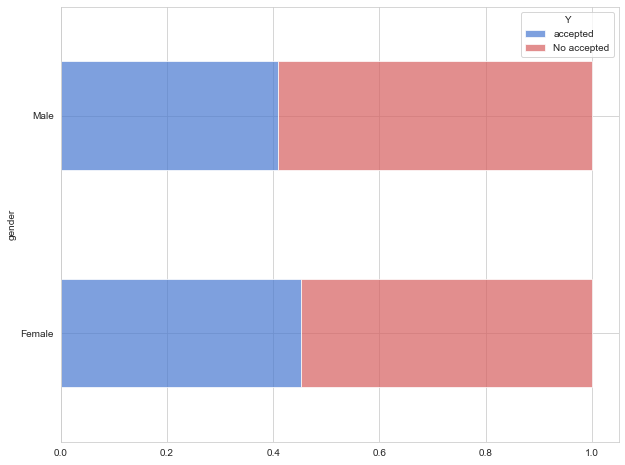

In [236]:
pd.crosstab(data2.gender,data2.Y,
normalize = "index").rename(columns = {0 : "accepted", 1: "No accepted"}).plot(kind = "barh", stacked = True, color = ["b","r"], alpha = 0.7)


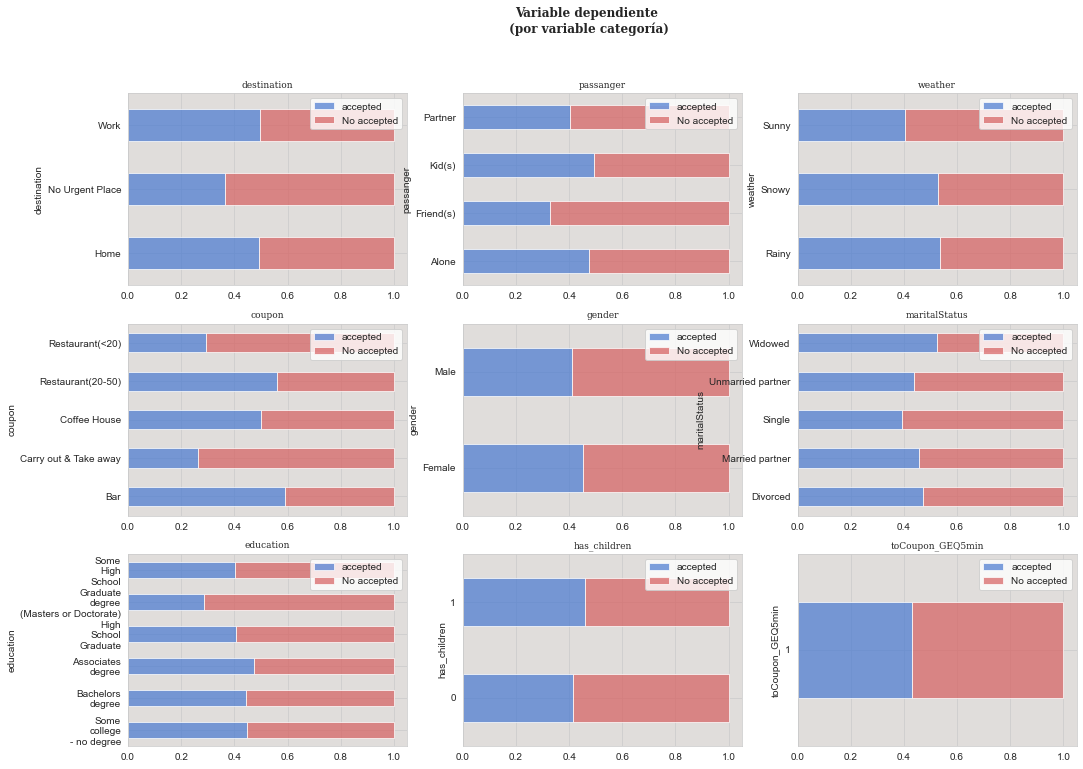

In [273]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,12))
axes = axes.flat

var_string =  ['destination', 'passanger', 'weather', 'coupon', 'gender',
       'maritalStatus', 'education', "has_children", 'toCoupon_GEQ5min']

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    pd.crosstab(data2[variable],data2.Y,
    normalize = "index").rename(columns = {0 : "accepted", 1: "No accepted"}).plot(kind = "barh", stacked = True, 
    color = ["b","r"], alpha = 0.7, ax = axes[i])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10,direction='out')
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")
etiqueta = data2.education.str.replace("\s","\n", n = 2).unique().tolist()
axes[6].set_yticklabels(etiqueta)
plt.show()

In [238]:
data2.select_dtypes(include = "object").columns
# ocuppation sacado
#'toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same', 'direction_opp'

Index(['destination', 'passanger', 'weather', 'coupon', 'gender',
       'maritalStatus', 'education', 'occupation', 'car'],
      dtype='object')

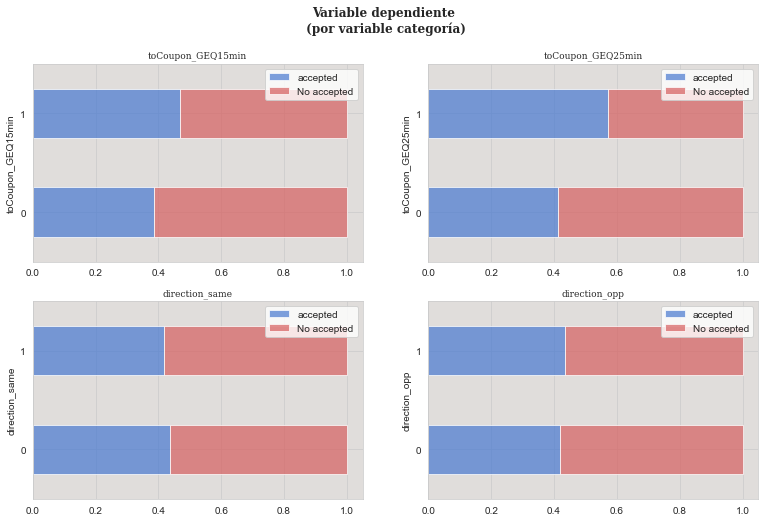

In [276]:
fig, axes = plt.subplots(nrows= 2,ncols = 2, figsize = (13,8))
axes = axes.flat

var_string =  ['toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same', 'direction_opp']

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    pd.crosstab(data2[variable],data2.Y,
    normalize = "index").rename(columns = {0 : "accepted", 1: "No accepted"}).plot(kind = "barh", stacked = True, 
    color = ["b","r"], alpha = 0.7, ax = axes[i])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10,direction='out')
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")
axe
plt.show()

In [277]:
# PREPARANDO LOS DATOS PARA EL MODELO DE MACHINE LEARNING